In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
import pandas as pd

In [238]:
data = pd.read_csv('Hitters.csv')
data = data.dropna(subset=['Salary'])
x = data[['AtBat',  'Hits',  'HmRun',  'Runs',  'RBI',  'Walks',  'Years',  'CAtBat', 'CHits', 'CHmRun','CRuns', 'CRBI',  'CWalks',  'League', 'Division', 'PutOuts',  'Assists', 'Errors', 'NewLeague']].values
y = data['Salary'].values.reshape(-1,1)
feats = ['Hits','Walks','Runs','Years','RBI','PutOuts', 'HmRun', 'Assists', 'Errors']
print(data)

            Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1          -Alan Ashby    315    81      7    24   38     39     14    3449   
2         -Alvin Davis    479   130     18    66   72     76      3    1624   
3        -Andre Dawson    496   141     20    65   78     37     11    5628   
4    -Andres Galarraga    321    87     10    39   42     30      2     396   
5     -Alfredo Griffin    594   169      4    74   51     35     11    4408   
6           -Al Newman    185    37      1    23    8     21      2     214   
7     -Argenis Salazar    298    73      0    24   24      7      3     509   
8       -Andres Thomas    323    81      6    26   32      8      2     341   
9      -Andre Thornton    401    92     17    49   66     65     13    5206   
10      -Alan Trammell    574   159     21   107   75     59     10    4631   
11       -Alex Trevino    202    53      4    31   26     27      9    1876   
12      -Andy VanSlyke    418   113     13    48   6

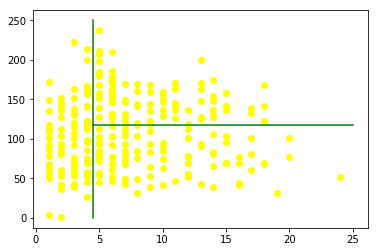

In [239]:
xl = [4.5]*len(x[:,1])
yl = [117.5]*len(x[:,6])

plt.scatter(x[:,6],x[:,1], color = 'yellow')
plt.plot(xl, np.linspace(0,250, len(x[:,1])), color = 'red')
plt.plot(np.linspace(4.5, 25, len(x[:,6])), yl, color = 'green')
plt.show()

In [245]:
testErrors = []
trainErrors = []
CrossValidations = []
testErrorserr = []
trainErrorserr = []
CrossValserr = []
train, test = train_test_split(data, test_size = 0.3)
for i in range(2,11):
    cvScores = []
    testScores = []
    trainScores = []
    for j in range(6):
        XS = np.array_split(train[feats], 6)
        YS = np.array_split(train['Salary'],6)
        x_test = XS.pop(j)
        y_test = YS.pop(j)       
        temp_train = pd.concat(XS)
        temp_test = np.concatenate(YS)
        
        dtr = DecisionTreeRegressor(max_leaf_nodes=i)
        dtr.fit(temp_train,temp_test)
        
        y_predict = dtr.predict(x_test)
        y_predict_test = dtr.predict(test[feats])
        y_predict_train = dtr.predict(temp_train)
        
        cvScores.append(mean_squared_error(y_predict, y_test))
        
        testScores.append(mean_squared_error(test['Salary'],y_predict_test))
        trainScores.append(mean_squared_error(temp_test,y_predict_train))
        
        
    CrossValidations.append(np.mean(cvScores))
    testErrors.append(np.mean(testScores))
    trainErrors.append(np.mean(trainScores))
    CrossValserr.append(np.std(cvScores))
    testErrorserr.append(np.std(testScores))
    trainErrorserr.append(np.std(trainningScores))

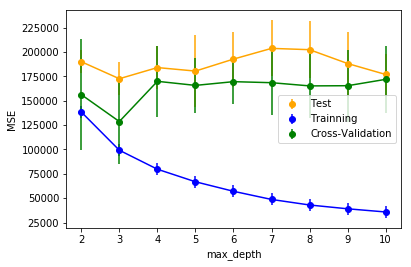

In [246]:
x = range(2,11)
plt.errorbar(x,testErrors,label = 'Test',yerr=testErrorserr, fmt = 'o', color = 'orange')
plt.plot(x,testErrors, color = 'orange')
plt.errorbar(x,trainErrors,label = 'Trainning',yerr=trainErrorserr, color = 'blue', fmt = 'o')
plt.plot(x,trainErrors, color = 'blue')
plt.errorbar(x,CrossValidations,label = 'Cross-Validation',yerr=CVserr,color = 'green', fmt = 'o')
plt.plot(x,CrossValidations, color = 'green')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

# Parte 2

In [225]:
data2 = pd.read_csv('Heart.csv', delimiter=';')
data2 = data2.drop(data2[data2.ca == '?'].index)
data2 = data2.drop(data2[data2.thal == '?'].index)
feats = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach', 'exang', 'oldpeak','slope','ca', 'thal']
data2.dropna()
print(data2)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
5     56    1   2       120   236    0        0      178      0      0.8   
6     62    0   4       140   268    0        2      160      0      3.6   
7     57    0   4       120   354    0        0      163      1      0.6   
8     63    1   4       130   254    0        2      147      0      1.4   
9     53    1   4       140   203    1        2      155      1      3.1   
10    57    1   4       140   192    0        0      148      0      0.4   
11    56    0   2       140   294    0        2      153      0      1.3   
12    56    

In [226]:
testErrors = []
trainErrors = []
CrossValidations = []
testErrorserr = []
trainErrorserr = []
CrossValserr = []
train, test = train_test_split(data2, test_size = 0.3)
for i in range(2,11):
    cvScores = []
    testScores = []
    trainScores = []
    for j in range(6):
        XS = np.array_split(train[feats], 6)
        YS = np.array_split(train['num'],6)
        x_test = XS.pop(j)
        y_test = YS.pop(j)       
        temp_train = pd.concat(XS)
        temp_test = np.concatenate(YS)
        
        dtr = DecisionTreeRegressor(max_leaf_nodes=i)
        dtr.fit(temp_train,temp_test)
        
        cvScores.append(mean_squared_error(dtr.predict(x_test),y_test))
        
        testScores.append(mean_squared_error(test['num'],dtr.predict(test[feats])))
        trainScores.append(mean_squared_error(temp_test,dtr.predict(temp_train)))
        
        
    CrossValidations.append(np.mean(cvScores))
    testErrors.append(np.mean(testScores))
    trainErrors.append(np.mean(trainScores))
    CrossValserr.append(np.std(cvScores))
    testErrorserr.append(np.std(testScores))
    trainErrorserr.append(np.std(trainningScores))

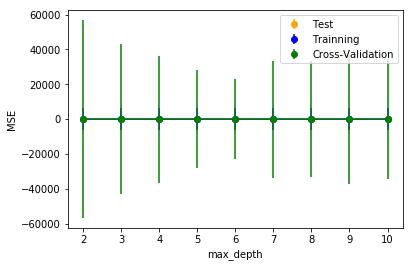

In [227]:
x = range(2,11)
plt.errorbar(x,testErrors,label = 'Test',yerr=testErrorserr, fmt = 'o', color = 'orange')
plt.plot(x,testErrors, color = 'orange')
plt.errorbar(x,trainErrors,label = 'Trainning',yerr=trainErrorserr, color = 'blue', fmt = 'o')
plt.plot(x,trainErrors, color = 'blue')
plt.errorbar(x,CrossValidations,label = 'Cross-Validation',yerr=CVserr,color = 'green', fmt = 'o')
plt.plot(x,CrossValidations, color = 'green')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

# Parte c

In [248]:
oj = pd.read_csv('OJ.csv')
oj = oj.drop(['Store7'],axis=1)
oj

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,0.201005,0.000000,0.24,0


In [259]:
X = oj[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']]
y = oj['Purchase']

feats = ['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

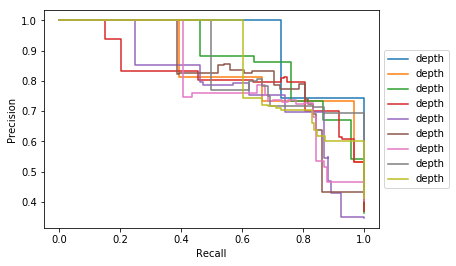

In [271]:
fig = plt.figure()
ax = plt.subplot(111)

areas  = []
for i in range(1,10):
    oj = oj.sample(frac=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    
    predict_proba = dtc.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, predict_proba)
    
    ax.step(recall, precision,label='depth'.format(i))
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()